In [139]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'D:\Anna\VE\Scripts\python.exe -m pip install --upgrade pip' command.


In [59]:
pip install xgboost

     -------------------------------------- 125.4/125.4 MB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'D:\Anna\VE\Scripts\python.exe -m pip install --upgrade pip' command.


In [86]:
pip install eli5

     -------------------------------------- 216.2/216.2 KB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 47.0/47.0 KB ? eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=6b99e7aec354cce173385e8defc23d16dcbf4c55598fb942df99c37dee30e94c
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\b8\58\ef\2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'D:\Anna\VE\Scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import eli5
import graphviz

In [10]:
from xgboost import XGBClassifier
from xgboost import plot_tree

In [2]:
df_train = pd.read_csv('DelayedFlights.csv') # https://www.kaggle.com/datasets/giovamata/airlinedelaycauses

In [54]:
nRow, nCol = df_train.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1936758 rows and 30 columns


In [ ]:
  #  или взять этот?   https://www.kaggle.com/datasets/sherrytp/airline-delay-analysis

In [6]:
df_train.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

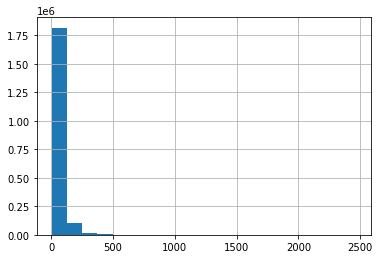

In [75]:
df_train['DepDelay'].hist(bins=20) # смотрим кол-во опоздавших

<AxesSubplot:>

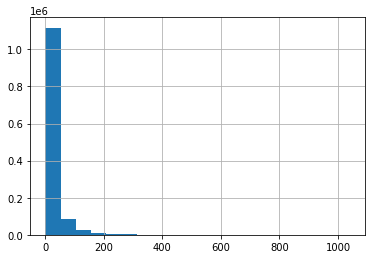

In [79]:
df_train[ df_train['DepDelay'] < 500 ]['CarrierDelay'].hist(bins=20)

<AxesSubplot:>

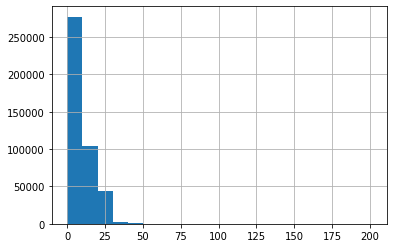

In [80]:
df_train[ df_train['DepDelay'] < 30 ]['CarrierDelay'].hist(bins=20)

In [21]:
df_train["Cancelled"].value_counts() # смотрим кол-во отмен

0    1936125
1        633
Name: Cancelled, dtype: int64

In [31]:
df_train["Cancelled"].value_counts(normalize=True)

0    0.999673
1    0.000327
Name: Cancelled, dtype: float64

<AxesSubplot:xlabel='Month'>

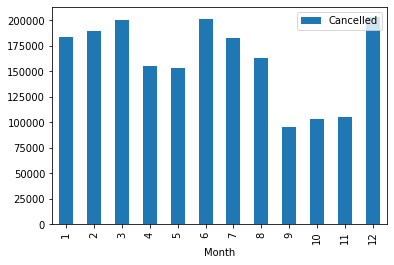

In [34]:
df_train[ ['Month', "Cancelled"] ].groupby('Month').agg('count').plot(kind="bar")

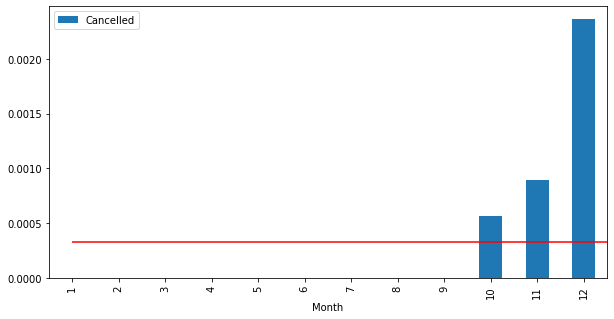

In [40]:
 # вероятность того, что самолет опаздает
df_train[ ['Month', "Cancelled"] ].groupby('Month').agg('mean').plot(kind="bar", figsize = (10, 5))
plt.hlines(y=np.mean(df_train[ "Cancelled"]), xmin=0, xmax=12, color="red")

In [44]:
df_train["DayOfWeek"].value_counts()

5    323259
1    290933
4    289451
7    286111
3    262805
2    260943
6    223256
Name: DayOfWeek, dtype: int64

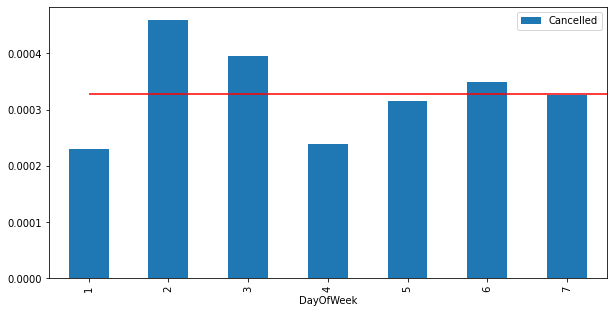

In [42]:
 # вероятность того, что самолет опаздает
df_train[ ['DayOfWeek', "Cancelled"] ].groupby('DayOfWeek').agg('mean').plot(kind="bar", figsize = (10, 5))
plt.hlines(y=np.mean(df_train[ "Cancelled"]), xmin=0, xmax=7, color="red")

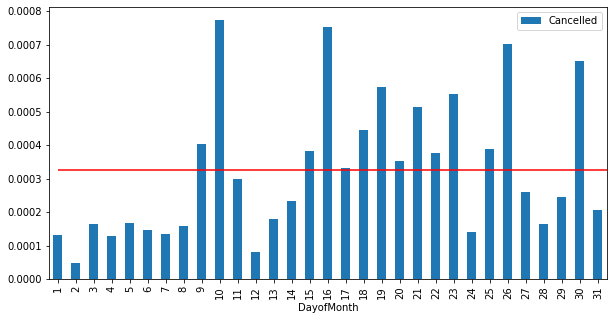

In [43]:
 # вероятность того, что самолет опаздает
df_train[ ['DayofMonth', "Cancelled"] ].groupby('DayofMonth').agg('mean').plot(kind="bar", figsize = (10, 5))
plt.hlines(y=np.mean(df_train[ "Cancelled"]), xmin=0, xmax=31, color="red")

In [57]:
df_train[ ['DepTime', "Cancelled"] ].groupby("Cancelled").agg(['mean', 'median'])

DepTime        
                  mean  median
Cancelled                     
0          1518.515542  1545.0
1          1575.347551  1650.0

In [ ]:
Distance

In [64]:
df_train[ ['Distance', "Cancelled"] ].groupby("Cancelled").agg(['mean', 'median', 'min', 'max'])

Distance                 
                 mean median min   max
Cancelled                             
0          765.738716  606.0  11  4962
1          604.932070  419.0  67  2677

In [3]:
feats = df_train.select_dtypes('number').columns
feats

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'FlightNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance',
       'TaxiIn', 'TaxiOut', 'Cancelled', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [4]:
print([x for x in feats if 'Delay' in x])

['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']


In [5]:
# убираем все сомнительные столбцы, столбцы, напрямую связанные с таргетом (delay, actual и AirTime (чтобы не подсказывать модели)

black_list = ['Unnamed: 0','ActualElapsedTime', 'AirTime', 'ArrTime', 'DepTime', 'ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

In [6]:
feats = [x for x in feats if x not in black_list]
feats

['Year',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'CRSDepTime',
 'CRSArrTime',
 'FlightNum',
 'CRSElapsedTime',
 'Distance',
 'TaxiIn',
 'TaxiOut',
 'Cancelled',
 'Diverted']

In [7]:
x_train = df_train[feats].values
y_train = df_train['DepDelay'].values

x_train.shape, y_train.shape

((1936758, 13), (1936758,))

In [8]:
# обучение и тюнинг модели
model = xgb.XGBRegressor(max_depth=5, n_estimators=100, learning_rate=0.3, random_state=0)
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [9]:
eli5.show_weights(model, feature_names=feats)

Weight,Feature
0.1224,TaxiOut
0.1211,DayofMonth
0.1184,Month
0.1057,TaxiIn
0.0865,CRSArrTime
0.0842,FlightNum
0.0805,DayOfWeek
0.0795,CRSDepTime
0.0660,Distance
0.0622,CRSElapsedTime


In [11]:
model.get_booster().feature_names = feats

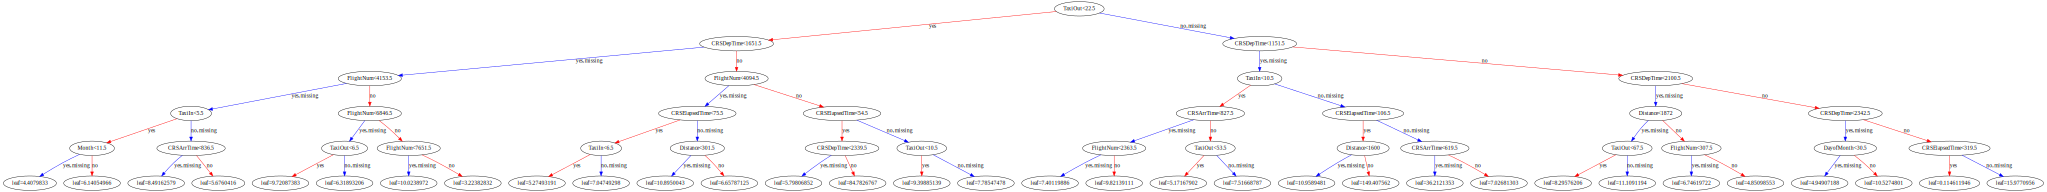

In [12]:
xgb.to_graphviz(model.get_booster(), num_trees=2)

In [28]:
format = 'png' #You should try the 'svg'

image = xgb.to_graphviz(model.get_booster(), num_trees=2)

#Set a different dpi (work only if format == 'png')
image.graph_attr = {'dpi':'400'}

image.render('tree', format = format)

'tree.png'

In [ ]:
# make predictions
predictions = model.predict(X_test)

image = xgb.to_graphviz(model)
export_graphviz(image, out_file='treexgb.dot', 
                rounded = True, proportion = False, 
                precision = 2, filled = True)


